<a href="https://colab.research.google.com/github/maferrepy/Censu-kaggle/blob/main/iexcenso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
df = pd.read_csv('/content/adult.csv')

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.replace("?", np.nan, inplace = True)


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.fillna('workclass', inplace= True)

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
np.unique(df['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([24720,  7841]))

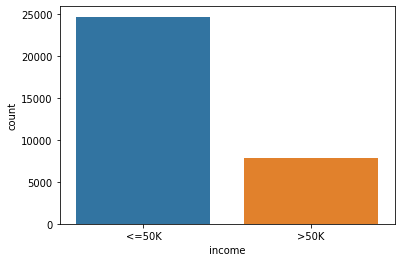

In [ ]:
sns.countplot(x= df['income']);

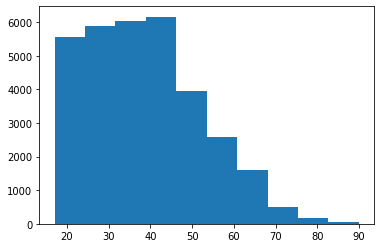

In [ ]:
plt.hist(x = df['age']);

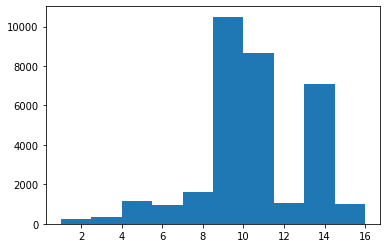

In [ ]:
plt.hist(x = df['education.num']);

In [ ]:
grafico = px.treemap(df, path= ['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(df, path= ['occupation', 'age','sex'])
grafico.show()

In [ ]:
np.unique(df['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([24720,  7841]))

In [ ]:
grafico2 = px.parallel_categories(df, dimensions=['occupation', 'relationship'])
grafico2.show()

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
x_census = df.iloc[:, 0:14].values

In [ ]:
x_census

array([[90, 'workclass', 77053, ..., 4356, 40, 'United-States'],
       [82, 'Private', 132870, ..., 4356, 18, 'United-States'],
       [66, 'workclass', 186061, ..., 4356, 40, 'United-States'],
       ...,
       [40, 'Private', 154374, ..., 0, 40, 'United-States'],
       [58, 'Private', 151910, ..., 0, 40, 'United-States'],
       [22, 'Private', 201490, ..., 0, 20, 'United-States']], dtype=object)

In [ ]:
y_census = df.iloc[: , 14].values
y_census

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
#transformar strings em numeros:from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
x_census[:, 1]

array(['workclass', 'Private', 'workclass', ..., 'Private', 'Private',
       'Private'], dtype=object)

In [ ]:
label_encoder_test = LabelEncoder()

In [ ]:
teste = label_encoder_test.fit_transform(x_census[:,1])
teste

array([8, 3, 8, ..., 3, 3, 3])

In [ ]:
x_census[0]

array([90, 'workclass', 77053, 'HS-grad', 9, 'Widowed', 'workclass',
       'Not-in-family', 'White', 'Female', 0, 4356, 40, 'United-States'],
      dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_edudation = LabelEncoder()
label_encoder_marietal = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()


In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_edudation.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marietal.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [ ]:
x_census[0]

array([90, 8, 77053, 11, 9, 6, 14, 1, 4, 0, 0, 4356, 40, 38], dtype=object)

In [ ]:
x_census

array([[90, 8, 77053, ..., 4356, 40, 38],
       [82, 3, 132870, ..., 4356, 18, 38],
       [66, 8, 186061, ..., 4356, 40, 38],
       ...,
       [40, 3, 154374, ..., 0, 40, 38],
       [58, 3, 151910, ..., 0, 40, 38],
       [22, 3, 201490, ..., 0, 20, 38]], dtype=object)

In [ ]:
# ONE HOT ENCONDER
# para que uma coluna nao seja mais importante que a outra.
# coluna workclass tem nobe 9 subclass 
# cada subclass fica 100000000
#                    010000000
#                    001000000

In [ ]:
len(np.unique(df['workclass']))

9

In [ ]:
# BIBLIOTECAS 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose  import ColumnTransformer

In [ ]:
onehotencoder_cesus = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder= 'passthrough')

In [ ]:
x_census = onehotencoder_cesus.fit_transform(x_census).toarray()

In [ ]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
x_census.shape

(32561, 108)

ESCALONAMENTO DE VALORES 'COLUNAS COM VALOES MUITO ALTOS'

In [ ]:
from sklearn. preprocessing import StandardScaler

In [ ]:
scaler_censu = StandardScaler()
x_census = scaler_censu.fit_transform(x_census)

In [ ]:
x_census[0]

array([-1.74295110e-01, -2.62097357e-01, -1.46638105e-02, -1.51679230e+00,
       -1.88389328e-01, -2.90935682e-01, -2.03761449e-01, -2.07399897e-02,
        4.09081281e+00, -1.71753247e-01, -1.93486624e-01, -1.16091949e-01,
       -7.20160099e-02, -1.01649545e-01, -1.42271803e-01, -1.26644948e-01,
       -1.84063764e-01, -2.10534334e-01, -4.43657054e-01, -1.13343872e-01,
        1.44939722e+00, -2.36373909e-01, -3.96074245e-02, -1.34195534e-01,
       -5.37144246e-01, -3.97508064e-01, -2.65869483e-02, -9.22840678e-01,
       -1.14036778e-01, -6.98783763e-01, -1.80284599e-01,  5.63830948e+00,
       -3.61861434e-01, -1.66277090e-02, -3.79495169e-01, -3.77745550e-01,
       -1.77450218e-01, -2.09577972e-01, -2.55954322e-01, -3.35541333e-01,
       -6.78016432e-02, -3.81663381e-01, -1.42608475e-01, -3.55316091e-01,
       -1.71278873e-01, -2.27103553e-01,  4.08257151e+00, -8.25333347e-01,
        1.70899099e+00, -1.76249722e-01, -4.29345818e-01, -3.44032316e-01,
       -2.24926808e-01, -

In [ ]:
# divisão da base de treinamento

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_censu_treinasmento, x_censu_teste, y_censu_treinamento, y_censu_teste = train_test_split(x_census, y_census,test_size=0.15, random_state=0)

In [ ]:
x_censu_treinasmento.shape,y_censu_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_censu_teste.shape, y_censu_teste.shape

((4885, 108), (4885,))

In [ ]:
import pickle

In [ ]:
with open('Census.pkl', mode = 'wb') as f:
  pickle.dump([x_censu_treinasmento, x_censu_teste, y_censu_treinamento, y_censu_teste],f)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_censu = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_censu.fit(x_censu_treinasmento, y_censu_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsao = arvore_censu.predict(x_censu_teste)
previsao

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
y_censu_teste

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
accuracy_score(y_censu_teste , previsao)

0.8186284544524053

0.8186284544524053

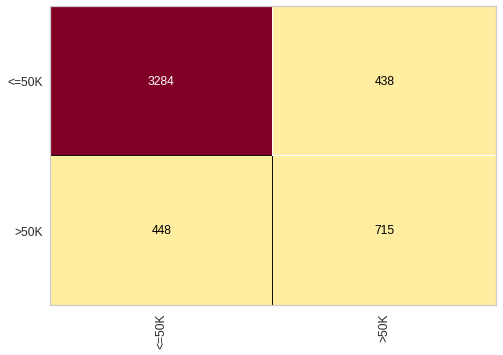

In [ ]:
cm = ConfusionMatrix(arvore_censu)
cm.fit(x_censu_treinasmento, y_censu_treinamento)
cm.score(x_censu_teste,y_censu_teste)


In [ ]:
print(classification_report(y_censu_teste,previsao))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3722
        >50K       0.62      0.61      0.62      1163

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885



# Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
x_censu_treinasmento.shape, y_censu_treinamento.shape

((27676, 108), (27676,))

In [97]:
forest_censu = RandomForestClassifier(n_estimators=70 , criterion='entropy', random_state= 0)

In [91]:
forest_censu.fit(x_censu_treinasmento,y_censu_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [92]:
previsores = forest_censu.predict(x_censu_teste)

In [93]:
previsores

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [94]:
y_censu_teste

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [95]:
accuracy_score(y_censu_teste, previsores)

0.8569089048106449

0.8569089048106449

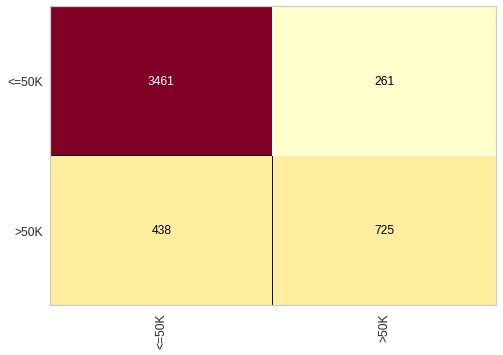

In [96]:
cm = ConfusionMatrix(forest_censu)
cm.fit(x_censu_treinasmento, y_censu_treinamento)
cm.score(x_censu_teste,y_censu_teste)

In [98]:
print(classification_report(y_censu_teste, previsores))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3722
        >50K       0.74      0.62      0.67      1163

    accuracy                           0.86      4885
   macro avg       0.81      0.78      0.79      4885
weighted avg       0.85      0.86      0.85      4885

